# Getting Started with Image Services
NASA Image Services can also be accessed programmatically using a variety of standard, open source, or licensed Python libraries. This section will outline how this data may be accessed using requests on the REST endpoint, using the qgis module associated with the open source OSGeo QGIS desktop software, and the arcpy (Desktop) and arcgis (Online) licensed libraries associated with the ArcGIS suite.

## requests
The built-in library requests allows the user to programmatically access many of the underlying REST service interface capabilities such as statistics, image export, histograms, or slices. For example, users can acquire various statistics in specific fields in JSON format:

In [1]:
import requests
import pandas as pd
 
url = r'https://gis.earthdata.nasa.gov/image/rest/services/POWER/POWER_901_MONTHLY_METEOROLOGY_UTC/ImageServer/multiDimensionalInfo?returnDimensionValues=always&f=pjson'
r = requests.get(url)
 
outDict = {}
 
for variable_dict in r.json()['multidimensionalInfo']['variables']:
    outDict[variable_dict['name']] = [variable_dict['attributes']['standard_name'],variable_dict['unit']]
 
display(pd.DataFrame.from_dict(outDict,orient='index',columns=['Long Name','Unit of Measurement']))

,Long Name,Unit of Measurement
CDD10,Cooling_Degree_Days_Above_10_C,degree-day
CDD18_3,Cooling_Degree_Days_Above_18.3_C,degree-day
DISPH,Zero_Plane_Displacement_Height,m
EVLAND,Evaporation_Land,kg m-2 s-1
EVPTRNS,Evapotranspiration_Energy_Flux,W m-2
FROST_DAYS,Frost_Days,days
GWETTOP,Surface_Soil_Wetness,1
HDD10,Heating_Degree_Days_Below_10_C,degree-day
HDD18_3,Heating_Degree_Days_Below_18.3_C,degree-day
PBLTOP,Planetary_Boundary_Layer_Top_Pressure,Pa


In [2]:
t2m_url = r'https://gis.earthdata.nasa.gov/image/rest/services/POWER/POWER_901_MONTHLY_METEOROLOGY_UTC/ImageServer/statistics?variable=T2M&renderingRule=&f=pjson'
r_t2m = requests.get(t2m_url)
 
stats = r_t2m.json()['statistics'][0]
display(stats)

{'min': 199.078125,
 'max': 314.9453125,
 'mean': 278.25700790851954,
 'standardDeviation': 21.776876164664852,
 'median': 282.22987132352944,
 'mode': 299.49635416666666,
 'skipX': 1,
 'skipY': 1,
 'count': 130999680}

Similarly, querying this variable can show what slice identifiers correspond to this variable. Queries on specific points for slices can be browsed on the slices capability pane. A sample is shown below:

In [3]:
url = r'https://gis.earthdata.nasa.gov/image/rest/services/POWER/POWER_901_MONTHLY_METEOROLOGY_UTC/ImageServer/slices?multidimensionalDefinition=%7B%22variableName%22%3A%22T2M%22%7D&f=json'
 
r = requests.get(url)
display(r.json()['slices'][25:55])
 
#'Values' dictionary list indices indicate epoch time; e.g., 415490850000 indicates Wednesday, March 2, 1983 10:07:30 PM GMT (per <https://www.epochconverter.com/>)

[{'sliceId': 8593,
  'multidimensionalDefinition': [{'variableName': 'T2M',
    'dimensionName': 'StdTime',
    'values': [415238400000]}]},
 {'sliceId': 8594,
  'multidimensionalDefinition': [{'variableName': 'T2M',
    'dimensionName': 'StdTime',
    'values': [417916800000]}]},
 {'sliceId': 8595,
  'multidimensionalDefinition': [{'variableName': 'T2M',
    'dimensionName': 'StdTime',
    'values': [420508800000]}]},
 {'sliceId': 8596,
  'multidimensionalDefinition': [{'variableName': 'T2M',
    'dimensionName': 'StdTime',
    'values': [423187200000]}]},
 {'sliceId': 8597,
  'multidimensionalDefinition': [{'variableName': 'T2M',
    'dimensionName': 'StdTime',
    'values': [425779200000]}]},
 {'sliceId': 8598,
  'multidimensionalDefinition': [{'variableName': 'T2M',
    'dimensionName': 'StdTime',
    'values': [428457600000]}]},
 {'sliceId': 8599,
  'multidimensionalDefinition': [{'variableName': 'T2M',
    'dimensionName': 'StdTime',
    'values': [431136000000]}]},
 {'sliceId': 

Finally, by browsing this REST endpoint capability or parsing it via JSON, a user can query a specific coordinate (100,50) for August 2nd, 1983 (slice 50, epoch time 428639580000):

In [4]:
from IPython.display import Markdown
 
url = r'https://gis.earthdata.nasa.gov/image/rest/services/POWER/POWER_901_MONTHLY_METEOROLOGY_UTC/ImageServer/identify?geometry=%7B%22x%22%3A100%2C%22y%22%3A50%7D&geometryType=esriGeometryPoint&mosaicRule=&renderingRule=&renderingRules=&pixelSize=&sliceId=1950&time=&returnGeometry=true&returnCatalogItems=true&returnPixelValues=true&processAsMultidimensional=true&maxItemCount=10&f=pjson'
 
r = requests.get(url)
display(Markdown("*Sample requests JSON response:*"))
display(r.json())
 
value = r.json()['value'].split('.')[0]
Markdown(f"**Query result:** {value} K")
r = requests.get(r'https://gis.earthdata.nasa.gov/image/rest/services/POWER/POWER_901_MONTHLY_METEOROLOGY_UTC/ImageServer/statistics?variable=T2M&renderingRule=&f=pjson')
temp_min = r.json()['statistics'][0]['min']

*Sample requests JSON response:*

{'objectId': 0,
 'name': 'Pixel',
 'value': '2.28882e-05',
 'location': {'x': 100,
  'y': 50,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}},
 'properties': {'Attributes': [{'Variable': 'EVLAND',
    'StdTime': 1501459200000,
    'StdTime_Max': 1501459200000}]},
 'catalogItems': None,
 'catalogItemVisibilities': []}

## ArcGIS API for Python

Users may perform much of the same functionality in web maps and in desktop software using Esri-developed Python packages arcpy and arcgis. This section of the tutorial will focus on the freely available online arcgis module which can be used easily in Esri's Experience Builder, Jupyter notebooks, or across a wide variety of programming and web environments and use cases.

The below examples use the GPM and POWER image services.

A user can import a give Image Service into a web map as follows utilizing the arcgis.mapping utilities to generate a custom map:

In [5]:
import arcgis
 
m = arcgis.mapping.WebMap()
 
GPM_url = r'https://arcgis.gesdisc.eosdis.nasa.gov/authoritative/rest/services/GPM_3IMERGHHE_06/ImageServer'
 
layer = arcgis.raster.ImageryLayer(GPM_url)
m.add_layer(layer)
display(m)

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

Users may also reference ArcGIS Online item ID's to import multiple layers with embedded symbology replacing the layer variable as noted above with gis.content.get(<ArcGIS item ID>).

Many of the queries in this section are attributes acquired via calling the dir function in established Imagery Layers and building out attributes in a more sequential fashion but with many similar outputs to the requests section, building them via layer object attributes rather than hardcoding into a URL request.

This is shown as such in the plethora of capabilities listed in the below code:

In [6]:
import arcgis
 
url = r'https://gis.earthdata.nasa.gov/image/rest/services/POWER/POWER_901_MONTHLY_METEOROLOGY_UTC/ImageServer'
 
layer = arcgis.raster.ImageryLayer(url)
print(dir(layer))

['__abs__', '__add__', '__and__', '__class__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '__xor__', '_add_rasters', '_clone_layer', '_compute_multidimensional_info', '_con', '_datastore_raster', '_delete_rasters', '_extent', '_extent_set', '_filtered', '_fn', '_fnra', '_get_service_info', '_gis', '_hydrate', '_hydrated', '_ilm', '_invoke', '_lyr_dict', '_lyr_domains', '_lyr

For example, users may parse through various slices, shown as the dictionary in the sample below:

In [7]:
slice_list = layer.slices()['slices']
 
display(slice_list[0])

{'sliceId': 0,
 'multidimensionalDefinition': [{'variableName': 'CDD10',
   'dimensionName': 'StdTime',
   'values': [349747200000]}]}

Slices and associated time slices for the Temperature at 2 Meters (T2M) variable can be loaded as follows:

In [8]:
T2M_slices = {}
 
import datetime
import pandas as pd
 
for slice in slice_list:
    #Stores underlying data in this particular service
    multi_def = slice['multidimensionalDefinition'][0]
    if multi_def['variableName'] == 'T2M':
        Id = slice['sliceId']
        time_epoch = multi_def['values'][0]
        #Convert epoch time (e.g., 349747200000 to GMT)
        GMT = datetime.datetime.fromtimestamp(time_epoch/1000)
        T2M_slices[Id] = [time_epoch,GMT]
         
df = pd.DataFrame.from_dict(T2M_slices,orient='index',columns=['Epoch Time','GMT Time'])
 
df.head()

,Epoch Time,GMT Time
8568,349747200000,1981-01-30 19:00:00
8569,352166400000,1981-02-27 19:00:00
8570,354844800000,1981-03-30 20:00:00
8571,357436800000,1981-04-29 20:00:00
8572,360115200000,1981-05-30 20:00:00


Now that the data has been compiled into user-readable time stamps, let us combine all previous analyses to assess a variable at a given point for a few months of the year.

We start by categorizing each month into a set of slices:

In [9]:
df['Month'] = pd.DatetimeIndex(df['GMT Time']).month
df['Year'] = pd.DatetimeIndex(df['GMT Time']).year
 
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_dict = {}
 
for i,month in enumerate(months,1):
    month_dict[month] = df[df['Month'] == i].index.tolist()
 
month_vis = pd.DataFrame.from_dict(month_dict,orient='index')
display(month_vis)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
January,8568,8580,8592,8604,8616,8628,8640,8652,8664,8676,...,8952,8964,8976,8988,9000,9012,9024,9036,9048,9060
February,8569,8581,8593,8605,8617,8629,8641,8653,8665,8677,...,8953,8965,8977,8989,9001,9013,9025,9037,9049,9061
March,8570,8582,8594,8606,8618,8630,8642,8654,8666,8678,...,8954,8966,8978,8990,9002,9014,9026,9038,9050,9062
April,8571,8583,8595,8607,8619,8631,8643,8655,8667,8679,...,8955,8967,8979,8991,9003,9015,9027,9039,9051,9063
May,8572,8584,8596,8608,8620,8632,8644,8656,8668,8680,...,8956,8968,8980,8992,9004,9016,9028,9040,9052,9064
June,8573,8585,8597,8609,8621,8633,8645,8657,8669,8681,...,8957,8969,8981,8993,9005,9017,9029,9041,9053,9065
July,8574,8586,8598,8610,8622,8634,8646,8658,8670,8682,...,8958,8970,8982,8994,9006,9018,9030,9042,9054,9066
August,8575,8587,8599,8611,8623,8635,8647,8659,8671,8683,...,8959,8971,8983,8995,9007,9019,9031,9043,9055,9067
September,8576,8588,8600,8612,8624,8636,8648,8660,8672,8684,...,8960,8972,8984,8996,9008,9020,9032,9044,9056,9068
October,8577,8589,8601,8613,8625,8637,8649,8661,8673,8685,...,8961,8973,8985,8997,9009,9021,9033,9045,9057,9069


From here, we establish a target latitude & longitude, under which we query specific time/variable slices and identify to the associated coordinate. TS (Earth Skin Temperature) is analyzed below temporally.

In [10]:

lon = -41
lat = 32
 
layer = arcgis.raster.ImageryLayer(url)
 
tempdata = {}
 
for row in df.iterrows():
    sliceId =row[0]
    result = layer.identify(geometry={"x":lon,"y":lat},slice_id=sliceId)
    result_C = float(result['value'])-273.15
    tempdata[sliceId] = round(result_C,3)
 
df['Temp (C)'] = tempdata.values()
 
display(tempdata)

{8568: 20.061,
 8569: 19.014,
 8570: 18.795,
 8571: 18.577,
 8572: 20.327,
 8573: 22.803,
 8574: 24.553,
 8575: 25.272,
 8576: 25.186,
 8577: 23.975,
 8578: 21.756,
 8579: 20.78,
 8580: 18.467,
 8581: 18.155,
 8582: 18.577,
 8583: 18.467,
 8584: 20.655,
 8585: 22.709,
 8586: 24.616,
 8587: 25.42,
 8588: 25.061,
 8589: 24.616,
 8590: 22.186,
 8591: 20.717,
 8592: 19.452,
 8593: 18.655,
 8594: 18.491,
 8595: 18.944,
 8596: 20.288,
 8597: 22.288,
 8598: 24.381,
 8599: 25.303,
 8600: 25.467,
 8601: 23.616,
 8602: 21.631,
 8603: 19.678,
 8604: 19.366,
 8605: 18.491,
 8606: 18.319,
 8607: 19.194,
 8608: 19.811,
 8609: 22.014,
 8610: 23.944,
 8611: 24.866,
 8612: 24.866,
 8613: 24.17,
 8614: 22.803,
 8615: 20.936,
 8616: 20.162,
 8617: 18.28,
 8618: 19.217,
 8619: 19.108,
 8620: 20.881,
 8621: 22.522,
 8622: 24.561,
 8623: 25.538,
 8624: 25.131,
 8625: 22.67,
 8626: 20.538,
 8627: 19.217,
 8628: 19.045,
 8629: 18.873,
 8630: 19.053,
 8631: 19.334,
 8632: 21.178,
 8633: 23.116,
 8634: 25.592,


We will now extract March to July data into separate series to be plotted:

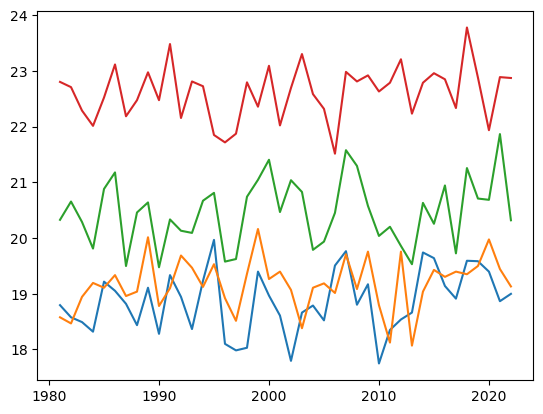

In [11]:
import matplotlib.pyplot as plt
 
xpoints = list(set(df['Year'].tolist()))
 
for ind,monthname in enumerate(months[2:6],3):
    plt.plot(xpoints,df[df['Month']==ind]['Temp (C)'],label=monthname)
     
plt.show()